<a href="https://colab.research.google.com/github/nehaansiddiqua/ML_workshop/blob/main/Train_a_multiple_linear_regression_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading data**

In [1]:
import pandas as pd


#Import the data from the .csv file
dataset = pd.read_csv('doggy-illness.csv', delimiter="\t") #'\t' indicates that tabs are used as delimiters.

#Let's have a look at the data
dataset

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


**Data visualization**

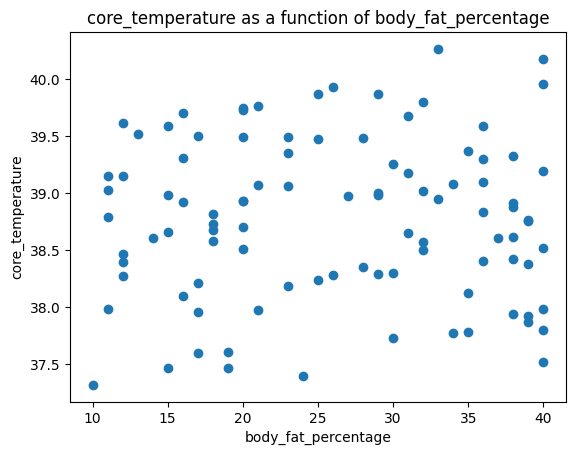

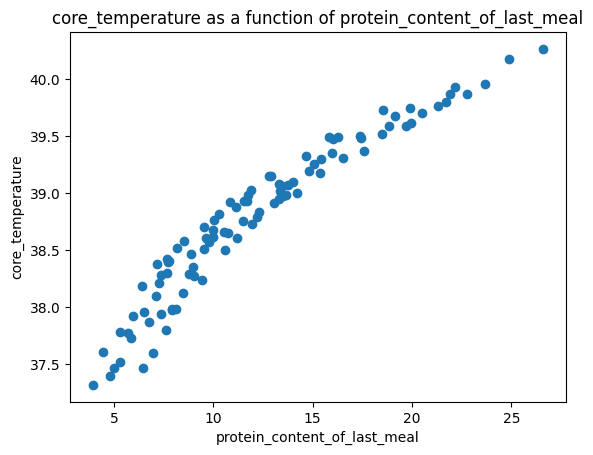

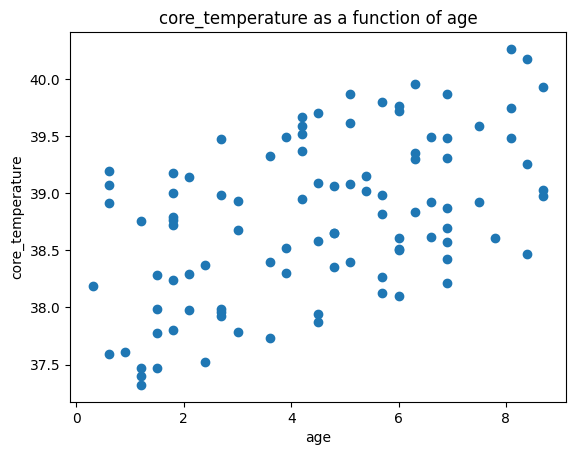

In [2]:
import matplotlib.pyplot as plt

def scatter_2D(data, label_x, label_y, show=True):
    plt.scatter(data[label_x], data[label_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(label_y + ' as a function of ' + label_x)
    if show:
        plt.show()

# Example usage:
scatter_2D(dataset, "body_fat_percentage", "core_temperature", show=True)
scatter_2D(dataset, "protein_content_of_last_meal", "core_temperature", show=True)
scatter_2D(dataset, "age", "core_temperature", show=True)

At a glance, fatter, older, and male dogs seem to more commonly have higher temperatures than thinner, younger, or female dogs. Dogs who ate a lot of protein last night also seem to be more unwell. The other features don't seem particularly useful.

**Simple linear regression**

male
R-squared: 0.0999007443071992


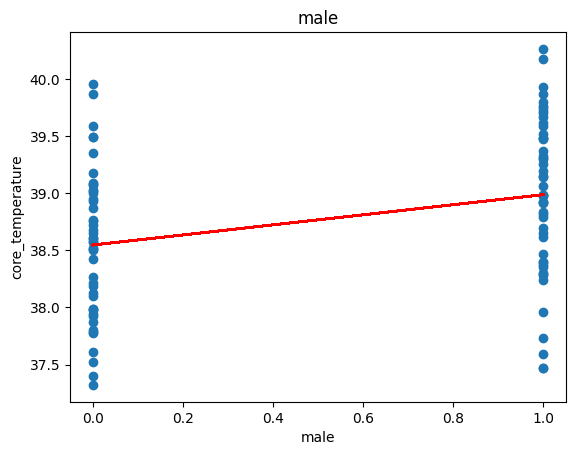

age
R-squared: 0.2648116081342463


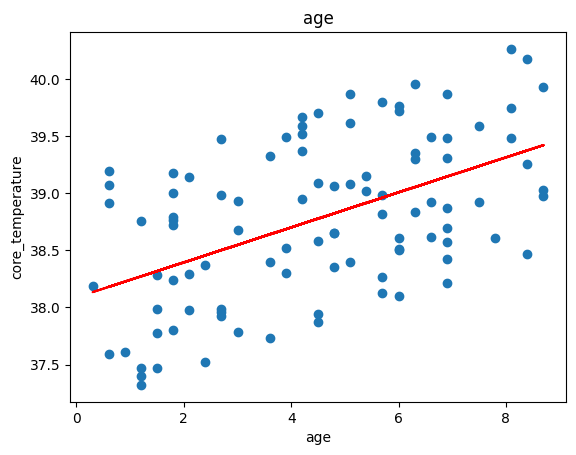

protein_content_of_last_meal
R-squared: 0.9155158150005704


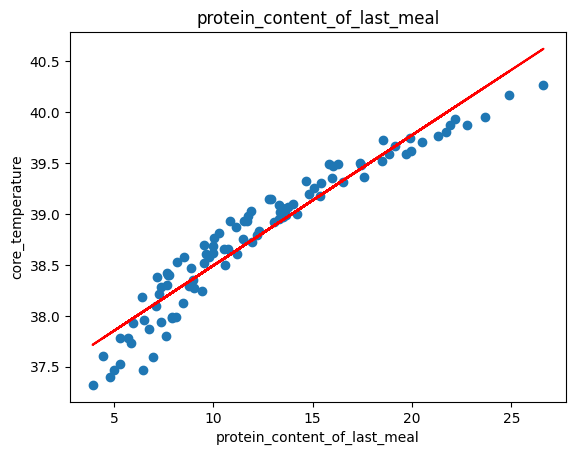

body_fat_percentage
R-squared: 0.00020809002637767193


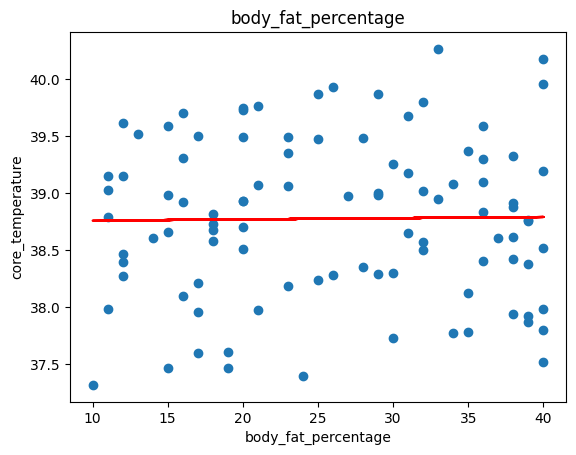

In [3]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


for feature in ["male", "age", "protein_content_of_last_meal", "body_fat_percentage"]:
    # Perform linear regression. This method takes care of
    # the entire fitting procedure for us.
    formula = "core_temperature ~ " + feature
    simple_model = smf.ols(formula = formula, data = dataset).fit()

    print(feature)
    print("R-squared:", simple_model.rsquared)

    # Create scatter plot with trendline
    plt.scatter(dataset[feature], dataset["core_temperature"])
    plt.plot(dataset[feature], simple_model.params[1]*dataset[feature] + simple_model.params[0], color='red')
    plt.xlabel(feature)
    plt.ylabel("core_temperature")
    plt.title(feature)
    plt.show()

**R-Squared**

**Multiple Linear Regression**

In [4]:
model = smf.ols(formula = "core_temperature ~ age + male", data = dataset).fit()
# two independent feature(input) 1)age 2) male

print("R-squared:", model.rsquared)

R-squared: 0.3148512699768006


**we add one dimension and work in 3D.**

---






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def predict(age, male):
 #This converts given age and male values into a prediction from the model
    df = pd.DataFrame(dict(age=[age], male=[male]))
    return model.predict(df)

# Create the surface graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_min, x_max = min(dataset.age), max(dataset.age)  # 1st Feature (age)
y_min, y_max = 0, 1                     # 2nd Feature (male)
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z1 = np.array([predict(x, y_min) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
Z2 = np.array([predict(x, y_max) for x, y in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

ax.plot_surface(X, Y, Z1, color='blue', alpha=0.5)
ax.plot_surface(X, Y, Z2, color='orange', alpha=0.5)
ax.scatter(dataset.age, dataset.male, dataset.core_temperature, c='red')

ax.set_xlabel('Age')
ax.set_ylabel('Male')
ax.set_zlabel('Core Temperature')
ax.set_title('3D Surface Plot')

plt.show()

**Inspecting our model**

In [ ]:
# Print summary information
model.summary()

In [ ]:
simple_model.summary()